In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import os

from training.lib.layers import MovingAverage

In [137]:
DATA_PATH = os.path.abspath("training/Data/daily_csv.csv")
COUNTRY = "South Africa"
AVERAGING_GAP = 14

In [138]:
def load_data(country=COUNTRY) -> np.ndarray:
	df = pd.read_csv(DATA_PATH)
	df = df[df["Country"] == country]
	df = df.dropna()
	return df["Value"].to_numpy()


In [139]:
data = load_data()

In [116]:
def simulate_moving_average_trade(averaging_gap) -> float:
	amount = 100.0
	moving_average = MovingAverage(averaging_gap)(data.reshape((1, -1, 1))).numpy().reshape((-1,))
	
	for i in range(365):
		if moving_average[i+1] > moving_average[i]:
			p = 1
		elif moving_average[i+1] < moving_average[i]:
			p = -1
		else:
			p = 0
		ratio = (data[averaging_gap + i]/data[averaging_gap + i - 1])**p
		
		amount *= ratio
		
	return amount


In [122]:
def calculate_max_amount(years, data=data):
	amount = 100

	for i in range(len(data)-int(years*365)-1, len(data)-1):
		ratio = data[i+1]/data[i]
		
		if ratio == 0:
			print("0")
		
		if ratio < 1:
			ratio = 1/ratio
	
		amount *= ratio
	
	return amount


In [123]:
def get_max_amount_country():
	countries = list(set(pd.read_csv(DATA_PATH)["Country"]))
	max_country = None
	max_amount = None
	for country in countries:
		print(f"\nCountry: {country}")
		amount = calculate_max_amount(1, data=load_data(country))
		print(f"Amount: {amount}")
		if max_country is None or amount > max_amount:
			max_country, max_amount = country, amount
		
	return max_country, max_amount
	

In [156]:
def plot_moving_average(average_gap, data=data, li=None, si=None):
	
	moving_average = MovingAverage(average_gap)(data.reshape((1, -1, 1))).numpy().reshape((-1,))
	
	if si is None:
		si = 0
	if li is None:
		li = moving_average.shape[0]
	
	plt.plot(data[average_gap-1+si:li-1])
	plt.plot(moving_average[si:li])
	

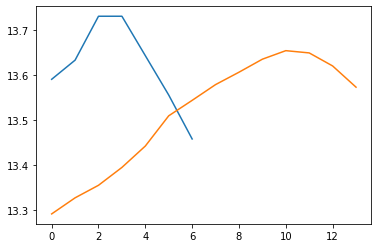

In [ ]:
plot_moving_average(7, si=-100, li=-(49-14))

In [153]:
d.shape[0] - d.dropna().shape[0]

8727

In [149]:
d.shape

(226533, 3)